In [3]:
import pandas as pd
import re
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Carregar o dataset
file_path = "../DATA/data.csv"
df = pd.read_csv(file_path)

# Verificar as primeiras linhas do dataset
print(df.head())

# Certificar-se de que o NLTK está configurado corretamente
nltk.download('punkt')
nltk.download('stopwords')

# Definir as stopwords
stop_words = set(stopwords.words('english'))

# Função para pré-processar o texto
def preprocess_text(text):
    # Remover pontuação e números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenização
    tokens = word_tokenize(text.lower())
    # Remover stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Aplicar o pré-processamento à coluna de texto do dataset (substitua 'sentiment_text_column' pelo nome real da coluna)
df['processed_text'] = df['Sentence'].apply(preprocess_text)

# Preparar a lista de sentenças para o Word2Vec (cada linha é uma lista de tokens)
sentences = df['processed_text'].tolist()

sentences

                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral


[nltk_data] Downloading package punkt to /home/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['geosolutions',
  'technology',
  'leverage',
  'benefon',
  'gps',
  'solutions',
  'providing',
  'location',
  'based',
  'search',
  'technology',
  'communities',
  'platform',
  'location',
  'relevant',
  'multimedia',
  'content',
  'new',
  'powerful',
  'commercial',
  'model'],
 ['esi', 'lows', 'bk', 'real', 'possibility'],
 ['last',
  'quarter',
  'componenta',
  'net',
  'sales',
  'doubled',
  'eurm',
  'eurm',
  'period',
  'year',
  'earlier',
  'moved',
  'zero',
  'pretax',
  'profit',
  'pretax',
  'loss',
  'eurm'],
 ['according',
  'finnishrussian',
  'chamber',
  'commerce',
  'major',
  'construction',
  'companies',
  'finland',
  'operating',
  'russia'],
 ['swedish',
  'buyout',
  'firm',
  'sold',
  'remaining',
  'percent',
  'stake',
  'almost',
  'eighteen',
  'months',
  'taking',
  'company',
  'public',
  'finland'],
 ['spy', 'wouldnt', 'surprised', 'see', 'green', 'close'],
 ['shells', 'billion', 'bg', 'deal', 'meets', 'shareholder', 'skepticism'],
 

In [4]:
# Treinar o modelo Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Explorar o modelo Word2Vec

# Exemplo: encontrar palavras similares a uma dada palavra
word = 'good'  # Substitua por uma palavra relevante do seu dataset
if word in word2vec_model.wv:
    similar_words = word2vec_model.wv.most_similar(word)
    print(f"Palavras mais similares a '{word}': {similar_words}")
else:
    print(f"'{word}' não está no vocabulário do modelo.")

# Obter o vetor de uma palavra
word_vector = word2vec_model.wv['good']
print(f"Vetor de 'good': {word_vector}")


Palavras mais similares a 'good': [('business', 0.9996513724327087), ('also', 0.9996246695518494), ('unit', 0.9996179938316345), ('market', 0.9995793700218201), ('around', 0.9995568990707397), ('time', 0.9995408654212952), ('deal', 0.9995296597480774), ('system', 0.9995225667953491), ('buy', 0.9995051026344299), ('sale', 0.9994956851005554)]
Vetor de 'good': [-0.04965096  0.17828417 -0.00254178 -0.01387849  0.05692554 -0.4312217
  0.19618632  0.6836813  -0.19302939 -0.05935432 -0.19807854 -0.5102354
  0.04809871  0.18773204  0.04146686 -0.07555984 -0.09646333 -0.41085327
  0.09849901 -0.66733    -0.02373294  0.28315935  0.1850718  -0.26795757
  0.00200584  0.03965912 -0.12681992 -0.30961332 -0.24654637  0.00190951
  0.5162019   0.08968394  0.15917037 -0.22654258 -0.10316504  0.3451245
 -0.03605516 -0.4316669  -0.28803506 -0.7643123   0.03762911 -0.4113456
 -0.20136295  0.10777268  0.23837411 -0.16390793 -0.43690038 -0.03725557
  0.19201054  0.10426594  0.03996453 -0.24264328 -0.1276597

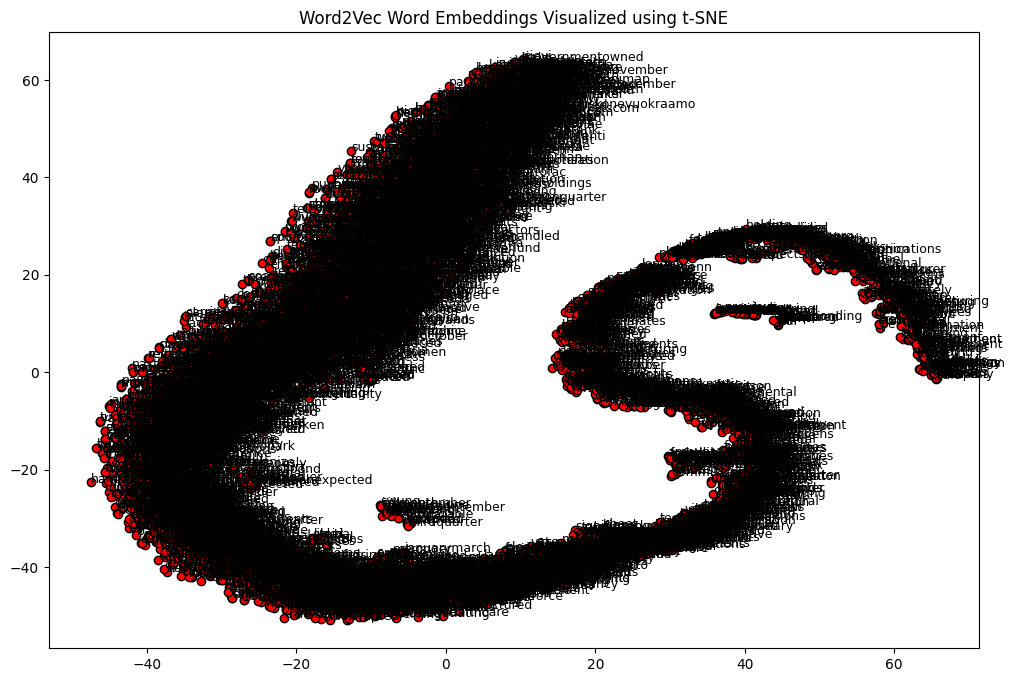

In [5]:
import pandas as pd
import re
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.express as px
# Preparar as sentenças para o modelo Word2Vec
sentences = df['processed_text'].tolist()

# Treinar o modelo Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Obter o vocabulário e os vetores de palavras
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# Reduzir a dimensionalidade dos vetores com t-SNE
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Visualizar os embeddings com matplotlib
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')

# Adicionar labels das palavras
for i, word in enumerate(words):
    plt.text(word_vectors_2d[i, 0] + 0.02, word_vectors_2d[i, 1], word, fontsize=9)

plt.title("Word2Vec Word Embeddings Visualized using t-SNE")
plt.show()

In [8]:
import plotly.express as px

# Criar um DataFrame para os resultados do t-SNE
df_tsne = pd.DataFrame(word_vectors_2d, columns=['x', 'y'])
df_tsne['word'] = words

# Plotar com Plotly
fig = px.scatter(df_tsne, x='x', y='y', text='word', title="Word2Vec Word Embeddings Visualized using t-SNE")

# Adicionar legendas às palavras
fig.update_traces(textposition='top center')

# Mostrar o gráfico
fig.show()